## Selecting the best location for a new well

We have data on the oil reserves in three regions, each region has a separate dataset. The budget for the development of 200 oil wells is 100 USD million. When exploring the region, a study of 500 points is carried out, thereby, picking the best 200 points for profit calculation. The revenue from one unit of product is 4500 dollars. We would collect the oil well parameters in each selected region, which are the oil quality, and volume of reserves. After which models will be built for predicting the volume of reserves in the new wells. The goal of this project is to select the region with the highest profit margin.


### Data Description

- `id:` unique oil well identifier 
- `f0, f1, f2:` three features of points (their specific meaning is unimportant, but the features themselves are significant)
- `product`: volume of reserves in the oil well(thousands of barrel)


## Table of Contents

- General Information
- Data Preprocessing
- Splitting data and model training
- Break-Even volume for each well
- Profit from selected wells and model predictions
- Risks and profit for each region
- Conclusion




## General Information

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle 
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_auc_score

Loading the various datasets

In [2]:
#Loading the first dataset
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [3]:
#Loading the second dataset
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [4]:
#Loading the third dataset
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Checking the information on each dataset and viewing the first five rows

In [5]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


The datasets contains 10000 rows, and 5 columns. All the columns have the right datatypes, and have no missing values.

Our target will be the "product" column, while the rest of the column will be used as features.

## Splitting Data and Model Training

To work on the data from the three regions, we will create a function that takes 4 data splits as arguments, namely: training features, valid features, training target, valid target. This function will train a Linear Regression model, and return the root mean squared error and the mean

In [11]:
#Creating a function with four arguments

def linreg_model(f_train, f_valid, t_train, t_valid):
    
    lr_model = LinearRegression()
    
    lr_model.fit(f_train, t_train)

    pred_valid_lr = lr_model.predict(f_valid)

    #Getting the root mean square error value
    
    rmse_val = (mean_squared_error(t_valid, pred_valid_lr) ** 0.5)

    return rmse_val, pred_valid_lr    

The column "id" is used to identify the reserves in each region. This column contains strings, therefore, it cannot be used in training our model. It will be dropped in the three datasets. Our target for this project is the "product" column. The rest of the columns will be assigned as features. The whole dataset will be split into two parts, namely: training, and validation in the ratio 75%, and 25%, respectively. 

The train_test_split() function will be used to perform this task of splitting the dataset. 

After the model is trained for each dataset, we will pass the arguments to our linreg_model function. Thereby, getting the mean squared error between the observation values and predicted values, and the mean of the predictions.

We start with the first region

In [12]:
feature_0 = geo_data_0.drop(["id","product"], axis = 1)
    
target_0 = geo_data_0["product"]
    
#splitting features, and targets into features_train (75%), features_valid(25%), target_train(75%)
#target_valid(25%)
    
ft_train_0, ft_valid_0, tgt_train_0, tgt_valid_0 = train_test_split(feature_0, target_0,\
                                                                test_size= 0.25, random_state=12345)

#training the model, and making predictions for the first dataset by calling the function linreg_function

rmse_val_0, predic_0= linreg_model(ft_train_0, ft_valid_0, tgt_train_0, tgt_valid_0)

print("RMSE value:", rmse_val_0, "Average predicted volume:",
      predic_0.mean())

RMSE value: 37.5794217150813 Average predicted volume: 92.59256778438035


The first Region has 37.57 as the RMSE value and 92.59 as the Average predicted volume

For the Second region

In [13]:
feature_1 = geo_data_1.drop(["id","product"], axis = 1)
    
target_1 = geo_data_1["product"]
    
#splitting features, and targets into features_train (75%), features_valid(25%), target_train(75%)
#target_valid(25%)
    
ft_train_1, ft_valid_1, tgt_train_1, tgt_valid_1 = train_test_split(feature_1, target_1,\
                                                                test_size= 0.25, random_state=12345)

#training the model, and making predictions for the first dataset by calling the function linreg_function

rmse_val_1, predic_1= linreg_model(ft_train_1, ft_valid_1, tgt_train_1, tgt_valid_1)

print("RMSE value:", rmse_val_1, "Average predicted volume:",
      predic_1.mean())

RMSE value: 0.893099286775617 Average predicted volume: 68.728546895446


The Second Region has 0.89 as the RMSE value and 68.72 as the mean prediction Average predicted volume

In [14]:
feature_2 = geo_data_2.drop(["id","product"], axis = 1)
    
target_2 = geo_data_2["product"]
    
#splitting features, and targets into features_train (75%), features_valid(25%), target_train(75%)
#target_valid(25%)
    
ft_train_2, ft_valid_2, tgt_train_2, tgt_valid_2 = train_test_split(feature_2, target_2,\
                                                                test_size= 0.25, random_state=12345)

#training the model, and making predictions for the first dataset by calling the function linreg_function

rmse_val_2, predic_2= linreg_model(ft_train_2, ft_valid_2, tgt_train_2, tgt_valid_2)

print("RMSE value:", rmse_val_2, "Average predicted volume:",
      predic_2.mean())

RMSE value: 40.02970873393434 Average predicted volume: 94.96504596800489


## Conclusion

The third region has a RMSE value of 40.02, and a mean prediction of 94.96. The Linear Regression model performed best in terms of the RMSE values in the second region with an accuracy of 0.89. However, in terms of mean prediction, the third region had the highest value of 94.96

## Break-even volume for each well

On this Project, the following information are given:
- The budget for development of 200 oil wells is 100 USD million 
- 500 points were studied and the best 200 points were picked for profit calculation
- One barrel of raw materials brings 4.5 USD of revenue
- The revenue from one unit of product is 4,500 dollars

To find the volume of products sufficient to develop a new well without losses, we need to determine the break-even volume. This would be achieved by dividing the cost per well by the income per volume

Saving the variables

In [15]:
points = 500

needed_points = 200

budget_prep_200 = 100000000
 
cost_per_raw_material = 4.5

income_per_volume = 4500

cost_per_well = budget_prep_200 / needed_points

break_even_volume = cost_per_well / income_per_volume

print(break_even_volume)

111.11111111111111


The Break-even volume calculated for each well is 111.11. This implies that for the wells to be profitable they must produce above 112 volumes. 

We would compare this result (111.11) to the averages of the three regions

In [16]:
print("Average production of Region 1 :", geo_data_0["product"].mean())

Average production of Region 1 : 92.50000000000001


In [17]:
print("Average production of Region 2 :", geo_data_1["product"].mean())

Average production of Region 2 : 68.82500000000002


In [18]:
print("Average production of Region 3 :", geo_data_2["product"].mean())

Average production of Region 3 : 95.00000000000004


The average production volume from each of the three Regions is below the break-even volume. This implies that the three regions are incurring losses if we select the wells to develop randomly. 

## Profit from selected wells and Model Predictions

We want to pick the wells with the highest values of predictions. We will write a function that will take the target, the predictions, and the number of wells as arguments to calculate profit

In [19]:
def reven_wells(target, predicted, n):
    
    predicted = pd.Series(predicted) #makes predictions into a series
    target = target.reset_index(drop=True) #resets the index of the target
    
    #sorting the prediction values in descending order and getting their index
    indices = predicted.sort_values(ascending = False).index
    
    return (target.loc[indices][:n].sum() * income_per_volume) - (cost_per_well * n)
    #This code returns the expected profit by using the target values and the number of wells
    
    

### Risk and Profit for each region

We will use the bootstrapping technique to create 1000 samples of the target and associate them with their respective predicted values, and calculate the profit for the 200 wells with the most profitable predictions for each sample, storing all the profit values in a list.

On a side note, we need to remember that the goal is to study 500 points and pick the best 200 points to calculate profit

In [20]:
def bootstrap(target, predictions):
    state = np.random.RandomState(12345)
    values = []
    target = target.reset_index(drop = True)
    
    #Next, we bootstrap
    
    for i in range(1000): 
        #Creating a sample of 500 target values
        target_sample = target.sample(n = points, replace = True, random_state = state)
        #Creating the prediction samples
        predic_sample = predictions[target_sample.index]
        
        values.append(reven_wells(target_sample, predic_sample, needed_points))
                
    return pd.Series(values)
    
    
rev_reg_1 = bootstrap(tgt_valid_0, predic_0) #bootstrap for the first region

rev_reg_2 = bootstrap(tgt_valid_1, predic_1) #bootstrap for the second region

rev_reg_3 = bootstrap(tgt_valid_2, predic_2) #bootstrap for the third region
    
    

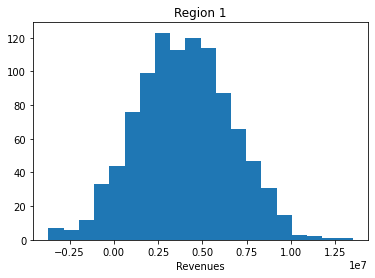

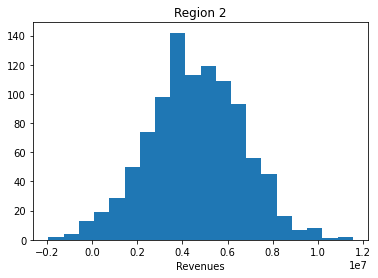

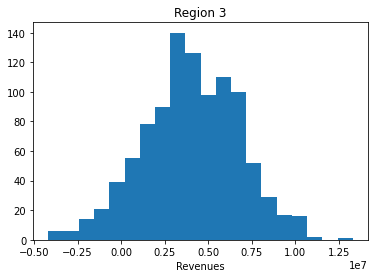

In [21]:
#Plotting a Histogram for the three regions

plots_hist = [rev_reg_1, rev_reg_2, rev_reg_3]

titles = ["Region 1", "Region 2", "Region 3"]

for i in range(3):
    plt.hist(plots_hist[i], bins = 20)
    plt.title(titles[i])
    plt.xlabel("Revenues")
    plt.show()
    

From the Histograms plotted, all regions are profitable, however, some losses are observed. For each region, we would calculate the 95% confidence intervals, the average profit, and the risk of loss as a percentage. 

Calculating the 95% confidence interval, average profit, and risk of loss as a percentage for Region 1

In [22]:
conf_int_1 = [rev_reg_1.quantile(0.025), rev_reg_1.quantile(0.975)]
avg_profit_1 = rev_reg_1.mean()
loss_risk_1 = len(rev_reg_1[rev_reg_1 < 0]) / rev_reg_1.shape[0]

print("Region 1")
print("average profit", avg_profit_1)
print("95% Confidence Interval:", conf_int_1)
print("Risk of Losses:", loss_risk_1)

Region 1
average profit 3961649.8480237117
95% Confidence Interval: [-1112155.4589049604, 9097669.41553423]
Risk of Losses: 0.069


In [23]:
conf_int_2 = [rev_reg_2.quantile(0.025), rev_reg_2.quantile(0.975)]
avg_profit_2 = rev_reg_2.mean()
loss_risk_2 = len(rev_reg_2[rev_reg_2 < 0]) / rev_reg_2.shape[0]

print("Region 2")
print("average profit", avg_profit_2)
print("95% Confidence Interval:", conf_int_2)
print("Risk of Losses:", loss_risk_2)

Region 2
average profit 4560451.057866608
95% Confidence Interval: [338205.0939898458, 8522894.538660347]
Risk of Losses: 0.015


In [24]:
conf_int_3 = [rev_reg_3.quantile(0.025), rev_reg_3.quantile(0.975)]
avg_profit_3 = rev_reg_3.mean()
loss_risk_3 = len(rev_reg_3[rev_reg_3 < 0]) / rev_reg_3.shape[0]

print("Region 3")
print("average profit", avg_profit_3)
print("95% Confidence Interval:", conf_int_3)
print("Risk of Losses:", loss_risk_3)

Region 3
average profit 4044038.665683568
95% Confidence Interval: [-1633504.1339559986, 9503595.749237997]
Risk of Losses: 0.076


## Conclusion

This project was done to build models to predict the volume of reserves in new wells, thereby, selecting the region with the highest profit margin.

We trained a Linear Regression model on datasets from three regions. The model performed best in terms of the RMSE values in the second region with an accuracy of 0.89. However, in terms of mean prediction, the third region had the highest value of 94.96. 

For the volume of production at each well to be considered profitable, production had to be above the break-even volume, which was calculated to be 111.11.

Bootstrapping was done on the target values, 500 new values were created, and the corresponding prediction values were used to calculate profit values for the top 200 reserves. After bootstrapping, we concluded that Region 2 is the best region for oil development. It has the best average profit of 4560451.057866608, the least risk of loss at 1.5%, and the best confidence interval limits (Lower Limit: 338205.0939898458, upper Limit 8522894.538660347
